**LAB9**

Write a local-search algorithm (eg. an EA) able to solve the Problem instances 1, 2, 5, and 10 on a 1000-loci genomes, using a minimum number of fitness calls. That's all.

In [6]:
from random import choices, random, sample
import numpy as np
import itertools
import matplotlib.pyplot as plt
import lab9_lib  # Assuming lab2_lib contains make_problem function

In [7]:
# Function to create a specific problem instance
def create_problem_instance(instance_number):
    return lab9_lib.make_problem(instance_number)


In [8]:
# Initialize a population of genomes
def initialize_population(size, length):
    return [choices([0, 1], k=length) for _ in range(size)]

In [9]:
# Perform mutation on a genome
def mutate(genome, mutation_rate):
    mutation_indices = np.random.choice(len(genome), int(len(genome) * mutation_rate), replace=False)
    for i in mutation_indices:
        genome[i] = 1 - genome[i]  # Flip the bit
    return genome


In [10]:
# Evaluate the fitness of a genome
def evaluate_fitness(genome, fitness_function):
    return fitness_function(genome)

In [11]:
# Local search algorithm
def local_search(problem_instance_number, genome_length, population_size, mutation_rate, max_generations, convergence_threshold):
    fitness_function = create_problem_instance(problem_instance_number)
    population = initialize_population(population_size, genome_length)
    fitness_cache = {}
    fitness_history = []

    best_fitness = float('-inf')
    generations_without_improvement = 0

    for generation in range(max_generations):
        # Evaluate fitness and cache results
        fitness_values = [fitness_cache.setdefault(tuple(individual), evaluate_fitness(individual, fitness_function)) for individual in population]

        # Find the best individual in the population
        best_index = np.argmax(fitness_values)
        current_best_fitness = fitness_values[best_index]

        # Update the best fitness and check for improvement
        if current_best_fitness > best_fitness:
            best_fitness = current_best_fitness
            generations_without_improvement = 0
        else:
            generations_without_improvement += 1

        # Termination check
        if generations_without_improvement >= convergence_threshold:
            break

        # Apply mutation to the best individual
        population[best_index] = mutate(population[best_index], mutation_rate)

        # Record fitness history
        fitness_history.append(best_fitness)

    total_fitness_calls = fitness_function.calls
    return best_fitness, total_fitness_calls, fitness_history


In [12]:
# Parameters
genome_length = 1000
population_size = 50 # Adjust as needed
mutation_rate = 0.15 #adviced by the professor
max_generations = 1000000 # Adjust as needed
convergence_threshold = 1000  # Adjust as needed
problem_instances = [1, 2, 5, 10] # Adjust as needed


Problem Instance 1: Best Fitness = 0.548, Fitness Calls = 71650
Problem Instance 2: Best Fitness = 0.53, Fitness Calls = 50050
Problem Instance 5: Best Fitness = 0.30689999999999995, Fitness Calls = 99550
Problem Instance 10: Best Fitness = 0.24959009000000001, Fitness Calls = 59750


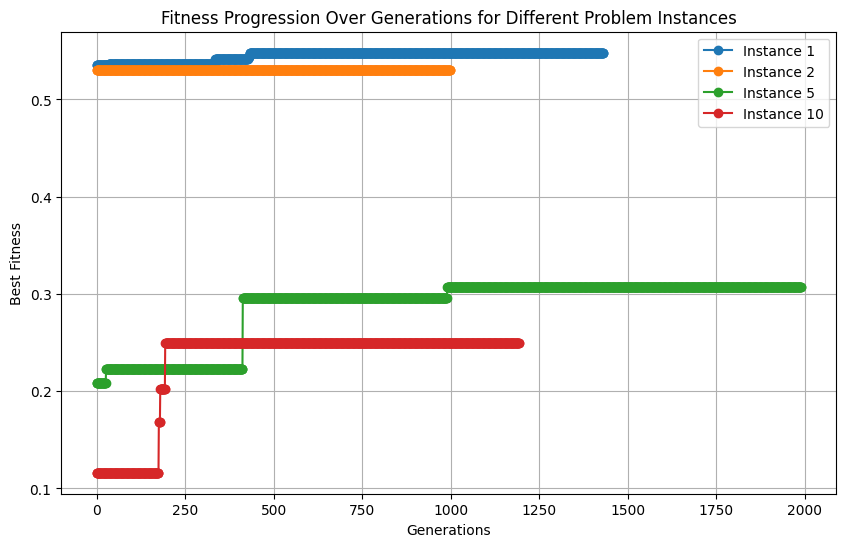

In [14]:
# Record keeping
best_fitness_per_instance = {}
fitness_calls_per_instance = {}
fitness_history_per_instance = {}

# Run the local search algorithm for each problem instance
for problem_instance_number in problem_instances:
    best_fitness, fitness_calls, fitness_history = local_search(problem_instance_number, genome_length, population_size, mutation_rate, max_generations, convergence_threshold)
    best_fitness_per_instance[problem_instance_number] = best_fitness
    fitness_calls_per_instance[problem_instance_number] = fitness_calls
    fitness_history_per_instance[problem_instance_number] = fitness_history

# Display results
for problem_instance_number in problem_instances:
    print(f"Problem Instance {problem_instance_number}: Best Fitness = {best_fitness_per_instance[problem_instance_number]}, Fitness Calls = {fitness_calls_per_instance[problem_instance_number]}")

# Visualization of fitness progression
plt.figure(figsize=(10, 6))

for problem_instance_number in problem_instances:
    fitness_history = fitness_history_per_instance[problem_instance_number]

    # Plot the fitness history
    plt.plot(range(len(fitness_history)), fitness_history, marker='o', label=f'Instance {problem_instance_number}')

plt.title("Fitness Progression Over Generations for Different Problem Instances")
plt.xlabel("Generations")
plt.ylabel("Best Fitness")
plt.grid(True)
plt.legend()  # Display a legend to identify problem instances
plt.show()